---
---
# Analyzing recent tweets in connection with Nepotism in bollywood and people's reaction over it
---
---

## Description :: 

I have collected recent 1000 random tweets that involved people's comment over nepotism in Bollywood. Task was to see people's sentiment and their inclination toward any trend if present.

## Process Involved :

- Accessing Twitter API and fetching recent tweets.
- Creating a dataframe with tweets and other infomation
- Performing string actions and cleaning the tweets before analyzing
- Cleaning is necessary as tweets may contain unwanted noise signal which may tamper with analysis
- Visualizing the output


In [1]:
# importing libaries

#for data wrangling
import pandas as pd
import numpy as np

#for twitter API
import tweepy as tw

#for string operations
import re

#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

#for natural language processing 
import nltk
from nltk.tokenize import word_tokenize                  # To tokenize the text
from nltk.corpus import stopwords                        # importing stopwords of english(words that doesn't give much info)
nltk.download('stopwords')
nltk.download('punkt')

from nltk.stem import SnowballStemmer, PorterStemmer     # for stemming process
from nltk.stem import WordNetLemmatizer                  # for lemmatization process
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pushp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pushp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pushp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Defining my twitter accound credentials to access twitter

consumer_key= 'ruvXoSAHku3iUddoiYXH98zQ1'
consumer_secret= '0EU58DM2u8mpjfE6EzDL4f3RZGskdzpFncmrxevhydGpHdMKq2'
access_token= '127445837-9MTZGaO3j2z9clGfJZPxIJfosdZpHJyKDVtoa7Xf'
access_token_secret= 'R8V2si7fDcUSaDvAPPSCsNaVh7pbBa9pjqHwsBnO3X1Ov'

#Performing authoruzation of credentials

auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit = True)


#efining the search and excluding Retweets in the process

new_search = "bollywood+nepotism -filter:retweets"

tweets1 = tw.Cursor(api.search,
                   q = new_search,
                   lang = 'en',
                   since = '2020-06-14').items(1000)


#Creating a user data of all the information gathered

user_data = [[tweet.user.id, tweet.user.name, tweet.user.location, tweet.user.statuses_count] for tweet in tweets1]


#Creating a dataframe of collected info to perform the analysis

nepo_df = pd.DataFrame(data = user_data, columns = ['Id', 'Name',' Location', 'Status_Count'])

In [2]:
# Importing the already saved dataset

df = pd.read_csv("E:/Data Science/Datasets/nepo_df.csv", sep = '\t')  
df

,Id,Name,Description,Followers,Location,Verified,Tweet_Text
0,NaN,NaN,NaN,NaN,NaN,NaN,@fayedsouza What a 'let down'(!) in the Sushan...
1,NaN,NaN,NaN,NaN,NaN,NaN,"SSR was bullied, he was cornered, he was gange..."
2,NaN,NaN,NaN,NaN,NaN,NaN,@jigneshmevani80 @AzmiShabana @Javedakhtarjadu...
3,NaN,NaN,NaN,NaN,NaN,NaN,@BeingSalmanKhan @narendramodi Don't waste Mon...
4,NaN,NaN,NaN,NaN,NaN,NaN,Don't waste Money On Bollywood\n\n• We work ha...
...,...,...,...,...,...,...,...
995,NaN,NaN,NaN,NaN,NaN,NaN,So where were #JayaBachchan and #HemaMalini at...
996,NaN,NaN,NaN,NaN,NaN,NaN,@AkKanpur I want to see this time how people w...
997,NaN,NaN,NaN,NaN,NaN,NaN,@KuldeepVerma76 @filmfare boycott the filth in...
998,NaN,NaN,NaN,NaN,NaN,NaN,@FarOutAkhtar Today #Bollywood has too many pr...


# Twitter API failed to provide other info about the tweets so proceeding with text data only

In [3]:
# Dropping all columns except text which contains tweets

df = df.drop(['Id', 'Name', 'Description', 'Followers', 'Location', 'Verified'], axis = 1)


#Setting Id of tweets as it was missing

df['Id'] = np.random.randint(1000000000, 2000000000, 1000)   
df

,Tweet_Text,Id
0,@fayedsouza What a 'let down'(!) in the Sushan...,1728631207
1,"SSR was bullied, he was cornered, he was gange...",1494727916
2,@jigneshmevani80 @AzmiShabana @Javedakhtarjadu...,1696599277
3,@BeingSalmanKhan @narendramodi Don't waste Mon...,1013355984
4,Don't waste Money On Bollywood\n\n• We work ha...,1038261670
...,...,...
995,So where were #JayaBachchan and #HemaMalini at...,1702646799
996,@AkKanpur I want to see this time how people w...,1870351111
997,@KuldeepVerma76 @filmfare boycott the filth in...,1487918352
998,@FarOutAkhtar Today #Bollywood has too many pr...,1162802375


In [4]:
# Renaming columns names into lower case for ease

df.columns = [cols.lower() for cols in df.columns]
df

,tweet_text,id
0,@fayedsouza What a 'let down'(!) in the Sushan...,1728631207
1,"SSR was bullied, he was cornered, he was gange...",1494727916
2,@jigneshmevani80 @AzmiShabana @Javedakhtarjadu...,1696599277
3,@BeingSalmanKhan @narendramodi Don't waste Mon...,1013355984
4,Don't waste Money On Bollywood\n\n• We work ha...,1038261670
...,...,...
995,So where were #JayaBachchan and #HemaMalini at...,1702646799
996,@AkKanpur I want to see this time how people w...,1870351111
997,@KuldeepVerma76 @filmfare boycott the filth in...,1487918352
998,@FarOutAkhtar Today #Bollywood has too many pr...,1162802375


# **Processing of the Text** ::

## Removing all hash tags in the tweets as hash tags don't give much info about the sentiment of the tweet

In [5]:
def remove_hashtags(tweets):

    clean_text = [re.sub(r'^[@]\S+', '', tweet) for tweet in tweets.split()]
    clean_text = ' '.join(clean_text)
    return clean_text

In [6]:
## Applying the function on tweets

df.tweet_text = df.tweet_text.apply(remove_hashtags)
df

,tweet_text,id
0,What a 'let down'(!) in the Sushant case. The...,1728631207
1,"SSR was bullied, he was cornered, he was gange...",1494727916
2,A lady who compares nepotism of bollywood w...,1696599277
3,Don't waste Money On Bollywood • We work har...,1013355984
4,Don't waste Money On Bollywood • We work hard ...,1038261670
...,...,...
995,So where were #JayaBachchan and #HemaMalini at...,1702646799
996,I want to see this time how people want to ch...,1870351111
997,boycott the filth in your mind feel lighter&...,1487918352
998,Today #Bollywood has too many problems and it...,1162802375


## Removing special characters

In [7]:
def remove_special_char(tweets):

    clean_tweet = ''.join(re.sub(r'\W+', ' ', tweet) for tweet in tweets)
    return clean_tweet

df.tweet_text = df.tweet_text.apply(remove_special_char)           # applying the function
df

,tweet_text,id
0,What a let down in the Sushant case The...,1728631207
1,SSR was bullied he was cornered he was gange...,1494727916
2,A lady who compares nepotism of bollywood w...,1696599277
3,Don t waste Money On Bollywood We work har...,1013355984
4,Don t waste Money On Bollywood We work hard ...,1038261670
...,...,...
995,So where were JayaBachchan and HemaMalini at...,1702646799
996,I want to see this time how people want to ch...,1870351111
997,boycott the filth in your mind feel lighter ...,1487918352
998,Today Bollywood has too many problems and it...,1162802375


## Removing digits/numbers from the tweets

In [8]:
def remove_num(tweets):
    clean_text = ''.join([tweet for tweet in tweets if not tweet.isdigit()])
    return clean_text

In [9]:
# Applying the function to remove numbers

df.tweet_text = df.tweet_text.apply(remove_num)
df

,tweet_text,id
0,What a let down in the Sushant case The...,1728631207
1,SSR was bullied he was cornered he was gange...,1494727916
2,A lady who compares nepotism of bollywood w...,1696599277
3,Don t waste Money On Bollywood We work har...,1013355984
4,Don t waste Money On Bollywood We work hard ...,1038261670
...,...,...
995,So where were JayaBachchan and HemaMalini at...,1702646799
996,I want to see this time how people want to ch...,1870351111
997,boycott the filth in your mind feel lighter ...,1487918352
998,Today Bollywood has too many problems and it...,1162802375


## Removing hyperlinks from the tweets

In [10]:
def remove_links(tweets):
    clean_text = re.sub(r"([^0-9A-Za-z \t])|(\w+:\/\/\S+)", ' ', tweets, flags=re.MULTILINE)
    clean_text = re.sub(r"http\S+|https\S+|www\S+", ' ', tweets, flags=re.MULTILINE)
    return clean_text

In [11]:
# applying function to remove links

df.tweet_text = df.tweet_text.apply(remove_links)
df

,tweet_text,id
0,What a let down in the Sushant case The...,1728631207
1,SSR was bullied he was cornered he was gange...,1494727916
2,A lady who compares nepotism of bollywood w...,1696599277
3,Don t waste Money On Bollywood We work har...,1013355984
4,Don t waste Money On Bollywood We work hard ...,1038261670
...,...,...
995,So where were JayaBachchan and HemaMalini at...,1702646799
996,I want to see this time how people want to ch...,1870351111
997,boycott the filth in your mind feel lighter ...,1487918352
998,Today Bollywood has too many problems and it...,1162802375


## Removing all double spaces in the tweets

In [12]:
def remove_double_space(tweets):
    clean_text = re.sub(r'\s+', ' ', tweets, flags = re.MULTILINE)
    return clean_text

In [13]:
# Applying function to remove spaces

df.tweet_text = df.tweet_text.apply(remove_double_space)
df

,tweet_text,id
0,What a let down in the Sushant case The suspe...,1728631207
1,SSR was bullied he was cornered he was ganged ...,1494727916
2,A lady who compares nepotism of bollywood wit...,1696599277
3,Don t waste Money On Bollywood We work hard W...,1013355984
4,Don t waste Money On Bollywood We work hard We...,1038261670
...,...,...
995,So where were JayaBachchan and HemaMalini at t...,1702646799
996,I want to see this time how people want to ch...,1870351111
997,boycott the filth in your mind feel lighter a...,1487918352
998,Today Bollywood has too many problems and it ...,1162802375


# Tokenizing Words :

In [14]:
#Defining stop words

stop_words = stopwords.words('english')

# Defining a function to tokenize tweets

def tokenize(tweets):
    tokenizer = word_tokenize(tweets)                                   # calling the module
    words = [i for i in tokenizer if i not in stop_words]               # removing words if they are in stopwords
    clean_text = ''.join(words)                                         # joining the texts again
    return clean_text


# Applying the function to tokenize the words

df.tweet_text.apply(tokenize)
df

,tweet_text,id
0,What a let down in the Sushant case The suspe...,1728631207
1,SSR was bullied he was cornered he was ganged ...,1494727916
2,A lady who compares nepotism of bollywood wit...,1696599277
3,Don t waste Money On Bollywood We work hard W...,1013355984
4,Don t waste Money On Bollywood We work hard We...,1038261670
...,...,...
995,So where were JayaBachchan and HemaMalini at t...,1702646799
996,I want to see this time how people want to ch...,1870351111
997,boycott the filth in your mind feel lighter a...,1487918352
998,Today Bollywood has too many problems and it ...,1162802375


## Removing single alphabets and two alphabets unworthy words from the tweets

In [15]:
def remove_alphabets(tweets):
    clean_text = re.sub(r'\s+[a-zA-Z0-9_]\s+', ' ', tweets, flags = re.MULTILINE)        # for single alphabet
    clean_text1 = re.sub(r'\s+[a-zA-Z][a-zA-Z]\s+', ' ', clean_text, flags = re.MULTILINE)    # for word with two alphabets
    clean_text2 = re.sub(r'\s+t\s+', ' ', clean_text1, flags = re.MULTILINE)                 # for single t alphabet
    clean_text3 = re.sub(r'\s+co\s+', ' ', clean_text2, flags = re.MULTILINE)                # for single word 'co'

    return clean_text3


# Applying function to all tweets

df.tweet_text = df.tweet_text.apply(remove_alphabets)
df

,tweet_text,id
0,What let down the Sushant case The suspected ...,1728631207
1,SSR was bullied was cornered was ganged agains...,1494727916
2,lady who compares nepotism bollywood with doc...,1696599277
3,Don waste Money Bollywood work hard Study har...,1013355984
4,Don waste Money Bollywood work hard Study hard...,1038261670
...,...,...
995,So where were JayaBachchan and HemaMalini the ...,1702646799
996,want see this time how people want change nep...,1870351111
997,boycott the filth your mind feel lighter amp ...,1487918352
998,Today Bollywood has too many problems and nee...,1162802375


# **Performing Stemming**

In [16]:
stemmer = PorterStemmer()

def stemming(tweets):
    stemmed_words = [stemmer.stem(word) for word in tweets]
    stemmed_words = ''.join(stemmed_words)
    return stemmed_words

df.tweet_text.apply(stemming)

0       What let down the Sushant case The suspected ...
1      SSR was bullied was cornered was ganged agains...
2       lady who compares nepotism bollywood with doc...
3       Don waste Money Bollywood work hard Study har...
4      Don waste Money Bollywood work hard Study hard...
                             ...                        
995    So where were JayaBachchan and HemaMalini the ...
996     want see this time how people want change nep...
997     boycott the filth your mind feel lighter amp ...
998     Today Bollywood has too many problems and nee...
999     Nepotism supporting nepotism bollywood style ...
Name: tweet_text, Length: 1000, dtype: object

# Performing Lemmatization

In [17]:


lemmatizer = WordNetLemmatizer()                                                     # calling the module

def lemmatization(tweets):
    lemma_words = [lemmatizer.lemmatize(word, pos = 'a') for word in tweets]
    lemma_words = ''.join(lemma_words)
    return lemma_words

df.tweet_text.apply(lemmatization)


0       What let down the Sushant case The suspected ...
1      SSR was bullied was cornered was ganged agains...
2       lady who compares nepotism bollywood with doc...
3       Don waste Money Bollywood work hard Study har...
4      Don waste Money Bollywood work hard Study hard...
                             ...                        
995    So where were JayaBachchan and HemaMalini the ...
996     want see this time how people want change nep...
997     boycott the filth your mind feel lighter amp ...
998     Today Bollywood has too many problems and nee...
999     Nepotism supporting nepotism bollywood style ...
Name: tweet_text, Length: 1000, dtype: object

## Removing single alphabets and two alphabets unworthy words from the tweets

In [18]:
def remove_alphabets(tweets):
  clean_text = re.sub(r'\s+[a-zA-Z0-9_]\s+', ' ', tweets, flags = re.MULTILINE)        # for single alphabet
  clean_text1 = re.sub(r'\s+[a-zA-Z][a-zA-Z]\s+', ' ', clean_text, flags = re.MULTILINE)    # for word with two alphabets
  clean_text2 = re.sub(r'\s+t\s+', ' ', clean_text1, flags = re.MULTILINE)                 # for single t alphabet
  clean_text3 = re.sub(r'\s+co\s+', ' ', clean_text2, flags = re.MULTILINE)                # for single word 'co'
  
  return clean_text3


# Applying function to all tweets

df.tweet_text = df.tweet_text.apply(remove_alphabets)
df

,tweet_text,id
0,What let down the Sushant case The suspected ...,1728631207
1,SSR was bullied was cornered was ganged agains...,1494727916
2,lady who compares nepotism bollywood with doc...,1696599277
3,Don waste Money Bollywood work hard Study har...,1013355984
4,Don waste Money Bollywood work hard Study hard...,1038261670
...,...,...
995,So where were JayaBachchan and HemaMalini the ...,1702646799
996,want see this time how people want change nep...,1870351111
997,boycott the filth your mind feel lighter amp ...,1487918352
998,Today Bollywood has too many problems and nee...,1162802375


## Converting all the tweets into lower case

In [19]:
df.tweet_text = [word.lower() for word in df.tweet_text]
df

,tweet_text,id
0,what let down the sushant case the suspected ...,1728631207
1,ssr was bullied was cornered was ganged agains...,1494727916
2,lady who compares nepotism bollywood with doc...,1696599277
3,don waste money bollywood work hard study har...,1013355984
4,don waste money bollywood work hard study hard...,1038261670
...,...,...
995,so where were jayabachchan and hemamalini the ...,1702646799
996,want see this time how people want change nep...,1870351111
997,boycott the filth your mind feel lighter amp ...,1487918352
998,today bollywood has too many problems and nee...,1162802375


### Iterating over texts and removing non english words from the tweet text

In [20]:
from nltk.corpus import words

final_words = []

for sentence in df.tweet_text:
    for word in sentence.split():
        final_words.append(word)

print('List containing all the english words used in the tweets:: \n\n', final_words[:100])
print('*' * 80), print('*' * 80)
print('\n\nTotal number of words in all tweets after the cleaning are :: ', len(final_words))
print('\n'), print('*' * 80), print('*' * 80)

List containing all the english words used in the tweets:: 

 ['what', 'let', 'down', 'the', 'sushant', 'case', 'the', 'suspected', 'hotly', 'chased', 'scheming', 'murderess', 'turns', 'out', 'xdhzlvvtil', 'ssr', 'was', 'bullied', 'was', 'cornered', 'was', 'ganged', 'against', 'was', 'never', 'given', 'due', 'credit', 'for', 'his', 'talent', 'amp', 'hard', 'wor', 'duzlid', 'lady', 'who', 'compares', 'nepotism', 'bollywood', 'with', 'doctors', 'amp', 'engineers', 'qesstb', 'don', 'waste', 'money', 'bollywood', 'work', 'hard', 'study', 'hard', 'give', 'tough', 'exams', 'amp', 'utnyep', 'don', 'waste', 'money', 'bollywood', 'work', 'hard', 'study', 'hard', 'give', 'tough', 'exams', 'amp', 'earn', 'thousand', 'few', 'lakhs', 'mcwuvnoy', 'kanganaji', 'you', 'quit', 'this', 'critical', 'juncture', 'cleaning', 'bollywood', 'nepotism', 'and', 'qbrrmaim', 'yes', 'indian', 'citizens', 'have', 'taken', 'pledge', 'uproot', 'bollywood', 'drug', 'mafia', 'gangism', 'uhxqsrcsk', 'bollywood', 'the']
*

(None, None, None)

# Calculating the probablity of words and frequency of their occurences 

In [21]:
from nltk.probability import FreqDist

frequency = FreqDist(final_words)
frequency.most_common(10)

[('bollywood', 675),
 ('nepotism', 522),
 ('the', 316),
 ('and', 290),
 ('you', 154),
 ('amp', 150),
 ('hard', 150),
 ('drugs', 141),
 ('don', 128),
 ('for', 118)]

## Plotting the most frequent words

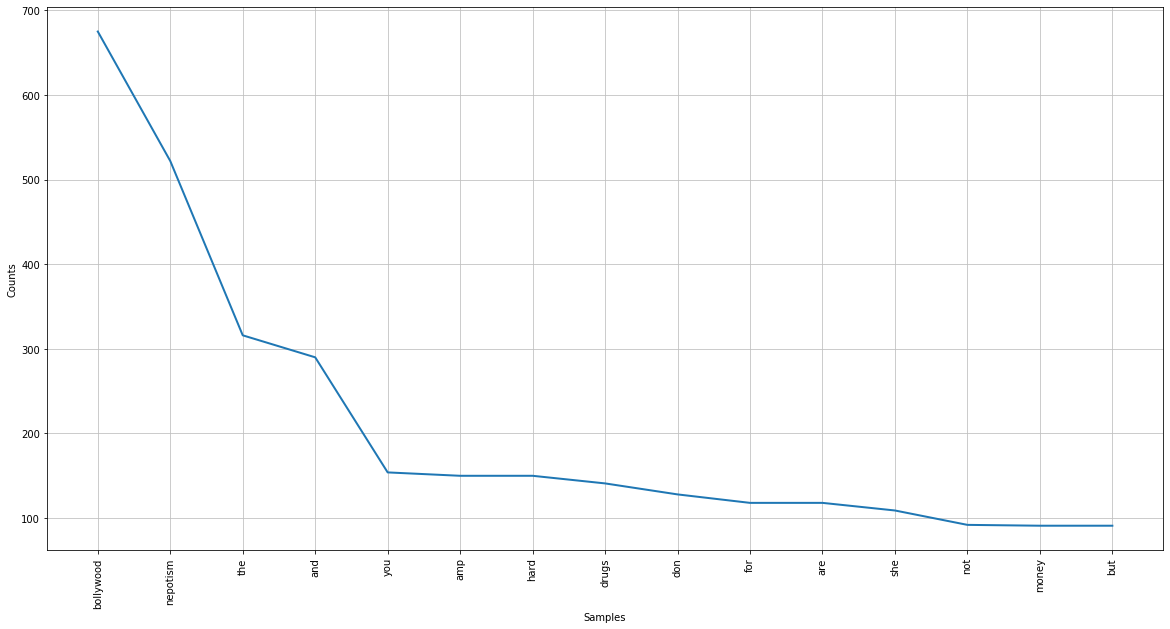

In [28]:
plt.figure(figsize = (20,10))
frequency.plot(15)

In [29]:
#joining the words of final_words array to make it a string

final_list = ' '.join(final_words)

print('First Few words of the final list are :: \n\n', final_list[:1000])

First Few words of the final list are :: 

 what let down the sushant case the suspected hotly chased scheming murderess turns out xdhzlvvtil ssr was bullied was cornered was ganged against was never given due credit for his talent amp hard wor duzlid lady who compares nepotism bollywood with doctors amp engineers qesstb don waste money bollywood work hard study hard give tough exams amp utnyep don waste money bollywood work hard study hard give tough exams amp earn thousand few lakhs mcwuvnoy kanganaji you quit this critical juncture cleaning bollywood nepotism and qbrrmaim yes indian citizens have taken pledge uproot bollywood drug mafia gangism uhxqsrcsk bollywood the worst industry boycottbollywood bollywooddruggang blackmoney murder sexualharassment nepotism mafialinks sirsa congratulations your initiative the country with you agai hryuwgeecp disagree with statemen mcalzdk drug mafia bollywood into india network destroying our count wwhwrkhwb watching and debate bollywood drugs an

## Visualizing the analysis of tweets to see what corpus of words were frequently used

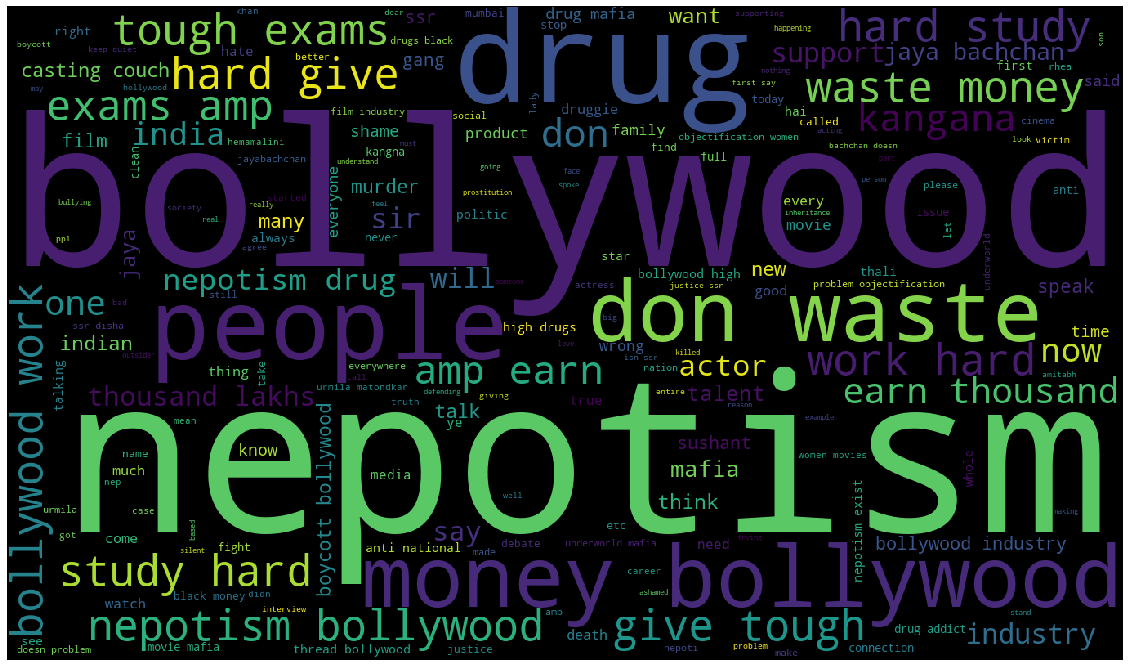

In [34]:
wordc = WordCloud(width = 1366, height = 800).generate(final_list)

fig = plt.figure(figsize = (20,20))
plt.imshow(wordc)
plt.axis('off')
plt.show()

---
---
# END
---
---